# Redes Neuronales

In [ ]:
import numpy as np

from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from mlutils import load_dataset
import matplotlib.pyplot as plt

%matplotlib inline

## Repaso de algunas funciones de activación

### ReLU

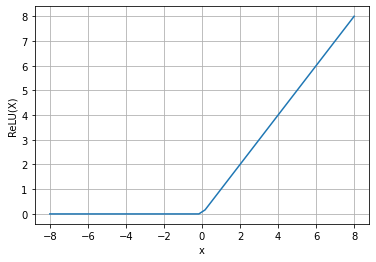

In [92]:
eje_x = np.linspace(-8,8)

def ReLU(x):
    return np.array([xi if xi >= 0 else 0 for xi in x])

plt.plot(eje_x, ReLU(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('ReLU(X)')
plt.show()

### Sigmoide

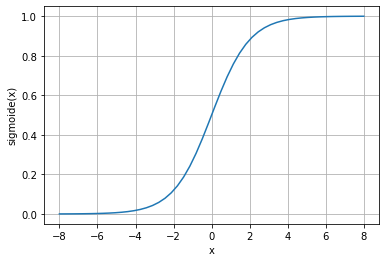

In [93]:
def sigmoide(x):
    return 1.0 / (1 + np.exp(-x))

plt.plot(eje_x, sigmoide(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('sigmoide(x)')
plt.show()

### Tangente hiperbólica

Text(0, 0.5, 'tanh(x)')

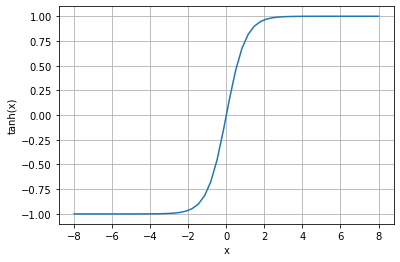

In [94]:
plt.plot(eje_x, np.tanh(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('tanh(x)')

## El problema: Determinar si una imagen tiene o no tiene un gato, dado un conjunto de datos con etiquetas.

<table>
  <tr>
    <th>Cat</th>
    <td> <img src="images/cat1.jpg" width="150"></td>
    <td> <img src="images/cat2.png" width="150"></td>
   </tr> 
   <tr>
      <th>Non Cat</th>
      <td> <img src="images/no_cat1.jpeg" width="150"></td>
      <td> <img src="images/no_cat2.jpg" width="150"></td>
  </tr>
</table>


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

## Normalización

In [3]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1)
X_train = X_train/255.
X_test = X_test/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

y = [1], it's a 'cat' picture.


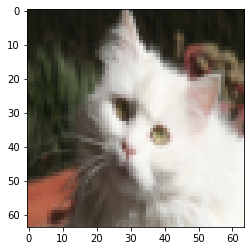

In [4]:
index = 102
# print (X_train[index].reshape(()))
plt.imshow(X_train_orig[index])
print ("y = " + str(Y_train[index]) + ", it's a '" + classes[np.squeeze(Y_train[index])].decode("utf-8") +  "' picture.")

## Implementación en Sklearn

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba)

In [84]:
clf = neural_network.MLPClassifier(
    solver='sgd',
    alpha=1e-4, 
    hidden_layer_sizes=(5),
    learning_rate='constant',
    learning_rate_init=0.001,
    batch_size=20,
    random_state=1,
    max_iter=1000,
    verbose=True)

In [85]:
clf.fit(X_train, Y_train.ravel())

Iteration 1, loss = 0.73637257
Iteration 2, loss = 0.72814070
Iteration 3, loss = 0.72206618
Iteration 4, loss = 0.71784621
Iteration 5, loss = 0.71409639
Iteration 6, loss = 0.70989772
Iteration 7, loss = 0.70659742
Iteration 8, loss = 0.70302878
Iteration 9, loss = 0.69942054
Iteration 10, loss = 0.69628679
Iteration 11, loss = 0.69333155
Iteration 12, loss = 0.69071555
Iteration 13, loss = 0.68790359
Iteration 14, loss = 0.68550357
Iteration 15, loss = 0.68305682
Iteration 16, loss = 0.68085484
Iteration 17, loss = 0.67877683
Iteration 18, loss = 0.67667372
Iteration 19, loss = 0.67460631
Iteration 20, loss = 0.67271247
Iteration 21, loss = 0.67108388
Iteration 22, loss = 0.66907659
Iteration 23, loss = 0.66728475
Iteration 24, loss = 0.66605890
Iteration 25, loss = 0.66441623
Iteration 26, loss = 0.66304044
Iteration 27, loss = 0.66154193
Iteration 28, loss = 0.66013801
Iteration 29, loss = 0.65879022
Iteration 30, loss = 0.65764886
Iteration 31, loss = 0.65623976
Iteration 32, los

MLPClassifier(batch_size=20, hidden_layer_sizes=5, max_iter=1000,
              random_state=1, solver='sgd', verbose=True)

In [96]:
total_params = 0
for case, name in zip(clf.coefs_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

for case, name in zip(clf.intercepts_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

print('total params = ', total_params)

wi = 61440
bias = 5
wi = 5
bias = 1
total params =  61451


In [97]:
np.round(np.exp(clf.predict_log_proba(X_train)),1)

array([[0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9,

In [98]:
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(Y_train.ravel() == predictions))/float(Y_train.size)*100))

Accuracy: 94 


In [99]:
predictions = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(Y_test, predictions)*100:.2f}')

print('i, match, case (1=cat, 0=nocat)')
for i, match in enumerate(predictions == Y_test.ravel()):
    if i<15:
        print(i,match, Y_test[i])


Accuracy: 68.00
i, match, case (1=cat, 0=nocat)
0 True [1]
1 True [1]
2 True [1]
3 True [1]
4 True [1]
5 False [0]
6 True [1]
7 True [1]
8 True [1]
9 True [1]
10 False [1]
11 True [1]
12 True [1]
13 False [0]
14 True [0]


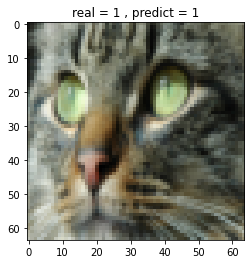

In [100]:
idx = 48
num_px = X_train_orig.shape[1]
plt.imshow(X_test[idx].reshape((num_px, num_px, 3)))
plt.title('real = '+str(Y_test[idx].item())+f' , predict = {predictions[idx]}')
plt.show()


Podemos ver cuál es la función de activación de salida

In [101]:
clf.out_activation_

'logistic'

# Keras

[Documentación](https://keras.io/api/models/model_training_apis/)

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import L2
from keras.utils import set_random_seed

set_random_seed(2)

[Dense layer](https://keras.io/api/layers/core_layers/dense/):

$y = activation(kernel \cdot X+bias)$


In [103]:
model = Sequential([
    Dense(5, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=L2(1e-4)),
    Dense(1, activation="sigmoid", kernel_regularizer=L2(1e-4))
])

In [104]:
opt = SGD(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics="acc"
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 61445     
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61,451
Trainable params: 61,451
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.fit(X_train, Y_train.ravel(), batch_size=20, epochs=500, validation_data=(X_test, Y_test), workers=2)

Epoch 1/500
11/11 [==============================] - 2s 58ms/step - loss: 0.7340 - acc: 0.3493 - val_loss: 0.6940 - val_acc: 0.6600
Epoch 2/500
11/11 [==============================] - 0s 13ms/step - loss: 0.7017 - acc: 0.3876 - val_loss: 0.6945 - val_acc: 0.6400
Epoch 3/500
11/11 [==============================] - 0s 16ms/step - loss: 0.6969 - acc: 0.4306 - val_loss: 0.6954 - val_acc: 0.6000
Epoch 4/500
11/11 [==============================] - 0s 11ms/step - loss: 0.6948 - acc: 0.4880 - val_loss: 0.6976 - val_acc: 0.4800
Epoch 5/500
11/11 [==============================] - 0s 13ms/step - loss: 0.6937 - acc: 0.5550 - val_loss: 0.6983 - val_acc: 0.4200
Epoch 6/500
11/11 [==============================] - 0s 13ms/step - loss: 0.6931 - acc: 0.6268 - val_loss: 0.6991 - val_acc: 0.3400
Epoch 7/500
11/11 [==============================] - 0s 13ms/step - loss: 0.6918 - acc: 0.6268 - val_loss: 0.6989 - val_acc: 0.4000
Epoch 8/500
11/11 [==============================] - 0s 13ms/step - loss: 0.

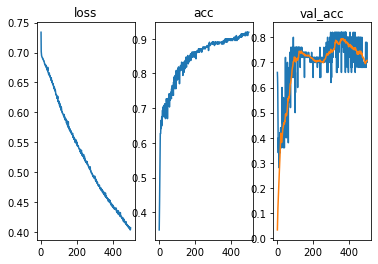

In [106]:
plt.subplot(1,3,1)
plt.plot(model.history.history['loss'])
plt.title('loss')
plt.subplot(1,3,2)
plt.plot(model.history.history['acc'])
plt.title('acc')
plt.subplot(1,3,3)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret/n
plt.plot(model.history.history['val_acc'])
plt.plot(moving_average(model.history.history['val_acc'],n=20))
plt.title('val_acc')
plt.show()

In [107]:
wnew = model.weights
wnew

[<tf.Variable 'dense_8/kernel:0' shape=(12288, 5) dtype=float32, numpy=
 array([[-0.01586143, -0.00610913, -0.0127541 , -0.00158877,  0.0213827 ],
        [ 0.0216919 , -0.0106661 , -0.01601708,  0.0238423 ,  0.00795786],
        [ 0.01899041,  0.00419009,  0.01461797, -0.00129426, -0.00489809],
        ...,
        [ 0.01703956, -0.03652566,  0.00810054,  0.02402745, -0.00740648],
        [-0.00294173, -0.01347304, -0.01421365,  0.02437849,  0.0044347 ],
        [ 0.00431814, -0.00925845, -0.00889222,  0.01649034,  0.00550443]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(5,) dtype=float32, numpy=
 array([-0.00092811,  0.01376831, -0.00077881,  0.00839761, -0.00037551],
       dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[0.25166836],
        [1.1996012 ],
        [0.03551644],
        [0.6976111 ],
        [0.05881934]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([-0.75177974]

In [108]:
X_train[0].shape

(12288,)

In [109]:
model.evaluate(x=X_test, y=Y_test, batch_size=100,)

1/1 [==============================] - 0s 39ms/step - loss: 0.5697 - acc: 0.7000


[0.5696632266044617, 0.699999988079071]

2/2 [==============================] - 0s 9ms/step
y = 1, you predicted that it is a "cat" picture.


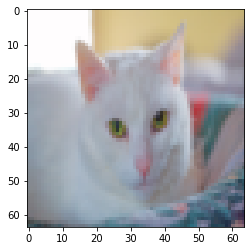

In [110]:
prediction = model.predict(x=X_test)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
prediction = prediction.squeeze()

index = 2
num_px = X_train_orig[index].shape[0]

plt.imshow(X_test[index,:].reshape((num_px, num_px, 3)))
print ("y = " + str(Y_test[index,0]) + ", you predicted that it is a \"" + classes[int(prediction[index])].decode("utf-8") +  "\" picture.")

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.82      0.70      0.75        33

    accuracy                           0.70        50
   macro avg       0.68      0.70      0.68        50
weighted avg       0.73      0.70      0.71        50



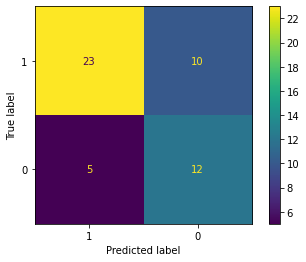

In [111]:
print(classification_report(Y_test, prediction))
ConfusionMatrixDisplay.from_predictions(Y_test, prediction,labels=(1,0))

# Representación gráfica de la red

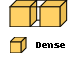

In [112]:
import visualkeras #hay que instalarlo
visualkeras.layered_view(model, legend=True)

In [113]:
from keras_visualizer import visualizer #hay que instalarlo
visualizer(model, filename='images/keras_visualizer', format='png', view=False)

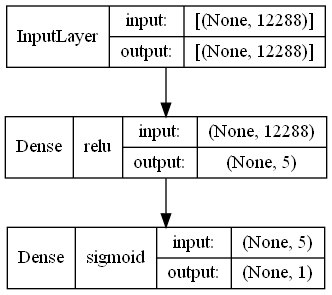

In [114]:
from keras.utils import plot_model

plot_model(model, 
to_file='images/model.png',
show_shapes=True,
show_layer_names=False,
show_layer_activations=True)